<a href="https://colab.research.google.com/github/avach0/macro-var/blob/main/MacroVAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vector Autoregression analysis of Macro-economic data**

In [ ]:
!pip install summarytools

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [ ]:
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px

In [ ]:
from pandas_summary import DataFrameSummary

In [ ]:
from summarytools import dfSummary

In [ ]:
filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'
data = pd.read_csv(filepath, parse_dates=['date'], index_col='date')
print(data.shape)

(123, 8)


In [ ]:
data

,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-01-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04-01,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07-01,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10-01,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8
...,...,...,...,...,...,...,...,...
1988-07-01,4042.7,3971.9,179.6,131.5,124.9,106.2,123.5,92.8
1988-10-01,4069.4,3995.8,181.3,133.3,126.2,107.3,124.9,92.9
1989-01-01,4106.8,4019.9,184.1,134.8,127.7,109.5,126.6,94.0


1. **rgnp**  : Real GNP.
2. **pgnp**  : Potential real GNP.
3. **ulc**   : Unit labor cost.
4. **gdfco** : Fixed weight deflator for personal consumption expenditure excluding food and energy.
5. **gdf**  : Fixed weight GNP deflator.
6. **gdfim** : Fixed weight import deflator.
7. **gdfcf** : Fixed weight deflator for food in personal consumption expenditure.
8. **gdfce** : Fixed weight deflator for energy in personal consumption expenditure.

In [ ]:
# Generate a summary for the entire DataFrame
summary = dfSummary(data)

summary

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,rgnp[float64],Mean (sd) : 2747.1 (702.4)min < med < max:1606.4 < 2734.0 < 4162.9IQR (CV) : 989.4 (3.9),123 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACrklEQVR4nO3cu47aQBSA4TOwrMxFthAKdDQpI6VwyUPkYfMIKXgCijRb0SEhZISzFsYmTTbKNlns8WXO6P/6YV38WtsznjH3+10A1w36vgDgEU99XwDeM8aMReTZ4ieu9/v9tanrcQWhOsQYM14sFt/CMJzX/Y3z+Xwyxnz3LVZCdctzGIbzzWbzGkVRVnVwkiTBdrudH4/HZxEhVLQriqJsuVz+qjl83OjFOIKXKahAqFCBUKECoUIFQoUKhAoVCBUqECpU+HDC33Lt2ct1Z3Tvv6Harj37uu6M7n30H7X22rPP687o3kNr/RZrz72tOzfwudxARMqaY3nkaZiXH6XYPrIURTFK0/TzbDZ7GQwGedXxPPI0z8tQxfJzuf1+P9/tdp/iOP65Wq1OVcbyyNMOX0MVkfqPLKfTaSwiMp1O1T3y+Ip5VKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKjj9ParFdpKwLMtR09eD/jgbqs12kjzPg6IovmRZ9kNE6p4zCoc4G6pYbCf5s5Vkcrvdhm1dHLrlcqgiUm87ydtWEviDlymoQKhQodVbf1EUIxEJjTF1hvPmjr9aCzVN01Ge51/X6/VwOBxW3lvPmzv+1Vqo1+v1KQiCSRzHWdVDHER4c8d7rb/11z3EgTf37rl8Xpfz01PohuvndREq3jh9XhehesZipiUsy3IURdHJxfO6CNUjNjMtrs+yEKpHbGZaXJ9lIdQW2N5+bf9+nduv67MshNown2+/fSLUhvl8++0TobbEx9tvn/h6CioQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFChYc+80uSJKj6w5fLJRARSdM0OBwOky7Ha/3bWq/bdvwjff0G3S+W6edmQ7sAAAAASUVORK5CYII="">",0(0.0%)
2,pgnp[float64],Mean (sd) : 2758.5 (735.0)min < med < max:1608.3 < 2743.4 < 4068.4IQR (CV) : 1292.8 (3.8),123 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACj0lEQVR4nO3dT4vaQByH8d/ousQ/RESqNy89Fnrw6Ivoi+1L6MFX4KGXnrwJIhHTDcZoL2spFKqZMY3f8HzOO5kQHnQ2O8O6y+ViwLNr1X0DwD1ebv2Ac65rZq+e1z9eLpc3z7HAb/8M1TnXHY/HX+I4HvlcfL/f75xzX4kVoW59or7GcTxaLBZvw+EwK3PhJEmi5XI52m63r2ZGqAhy86vfzGw4HGaTyeSnx/W7HmOAv/DLFCQQKiQQKiQQKiQQKiQQKiQQKiQQKiTc9cLfV1EUHTOLnXO+l2CvAMyswlDTNO3kef55Npu12+12qT+/XrFXAFeVhXo8Hl+iKOrN5/NsOp3uyo5nrwD+VOlXv5lZv9/33Sdgxl4BvKs81BCBa1zWtw3ytKGGrnFZ3zbL04YassZlfds8TxvqVcAal/Vtgzx9qIrqPGfW1DNuhPpgdZ4za/IZN0J9vDrPmTX2jBuhVqTOc2ZNPOPW2FAfsM+gZWZnj3Hx+Xzu+E4aeN91zm3m/8zMbqyPGxlq6DvYoig6aZp+HAwGP1qtVl5mbJ7nUVEUn7Is+2ZmpT7VQu+7zrlDnpnZ7fVxI0MN3WewXq9Hq9Xqw3w+/152/PvY3ul0aped90H3XefcXs/snvVxI0O98n0Hu9vtur7jr2NDhN53nXNX9d6bjdOQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQcNf/mUqSJCp74cPhEJmZpWkabTab3v8crzq36n2Hjr+nr1+RRaqgaoqvDgAAAABJRU5ErkJggg=="">",0(0.0%)
3,ulc[float64],Mean (sd) : 98.3 (47.7)min < med < max:47.5 < 81.5 < 187.4IQR (CV) : 97.8 (2.1),111 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADG0lEQVR4nO3dvU/bQBiA8fcSEtmE+hSShi1LR6QOkViydOvIH9u1W5FA6szQpRMLQoqMo7hEMU46lNBKpUl8h6lf8/xm/DE8wue7i2xWq5UAVdf43zcA7GJv2x8YY0IRaTuef7Fare4cjwUebQzVGBP2er3TKIq6LiefTqexMeYTscLXtv+o7SiKuuPx+M5aOy9y4iRJgvPz8+5kMmmLCKHCy9ZHv4iItXY+GAx+OJw/dDgG+AsvU1CBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCjt9bMJVnuctEYmMMa6n4DtVEJESQ03TtJVl2fvhcNhsNpuFPv2zxneqsFZaqIvFYi8Igv3RaDQ/OjqKix7Pd6rwp1If/SIinU7H9RtVInynCg94mYIKhAoVCBUqECpUIFSoQKhQofTpKbwsY0woIm3HwxsisvS4fGkriYRaI8aYsNfrnUZR1C16bJ7nrTRN3x0cHHxvNBqZy/Vvb29nxpjPIuKyErkxckKtl3YURd3xeHxnrS0Uy9XVVffy8vLtaDT65rKSeH19/ebi4uLDcDjsuyyZb1sur22ono9AEcUbYqy1hVcD4zgORdxXEuM4Dl2XzHdZLq90qB67r4LDw8OP1tqO67XZEOPGY8l843J5ZUP12X2VZVkgIscnJydf+/3+tOi12RBTPZUN1Wf31cN4az8IgowNMfVQ2VDXXB4l6/GWRp5j62i5XLae836qovKhviY+00siv4Y8eZ4fz+fzLyLi+iSpJEL9B8+f0bjOGDhPL4n8HvLc3983Ha5daYT6BN+f0fjOGLhML4noHvJsQ6hP8HmRS5IkODs7G0wmk74xpuiMQ23HmL4IdQOXFznfabW6jjF9Eeoze45ptTqOMX0Rakle27Ra2diPChUIFSrs9OhPkiQoeuLZbBaIiKRpGtzc3Oy/5PFar631vn2P36Wvn+/3kq0QS+cTAAAAAElFTkS

In [ ]:
df = data.copy()
df

,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-01-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04-01,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07-01,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10-01,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8
...,...,...,...,...,...,...,...,...
1988-07-01,4042.7,3971.9,179.6,131.5,124.9,106.2,123.5,92.8
1988-10-01,4069.4,3995.8,181.3,133.3,126.2,107.3,124.9,92.9
1989-01-01,4106.8,4019.9,184.1,134.8,127.7,109.5,126.6,94.0


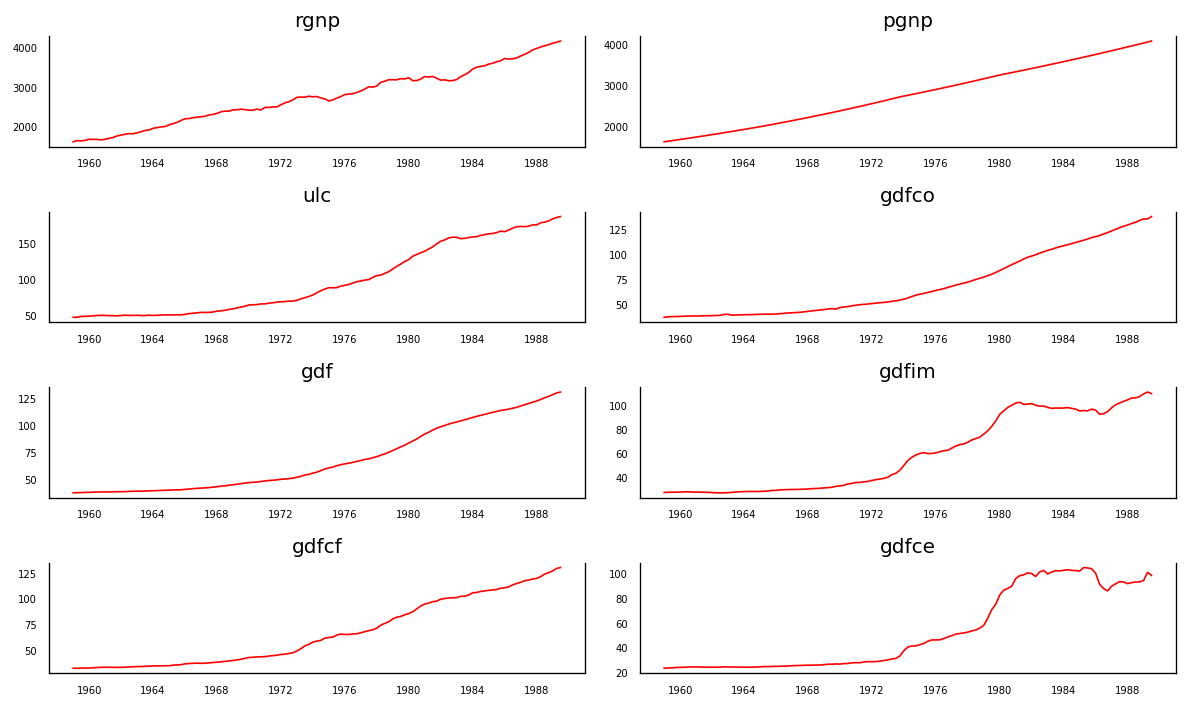

In [ ]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [ ]:
# Plot with Plotly
fig = px.line(df, x=df.index, y=df.columns, title='Macro Variables Movement')
fig.update_layout(xaxis_title='Time-Frame', yaxis_title='Values')
fig.show()

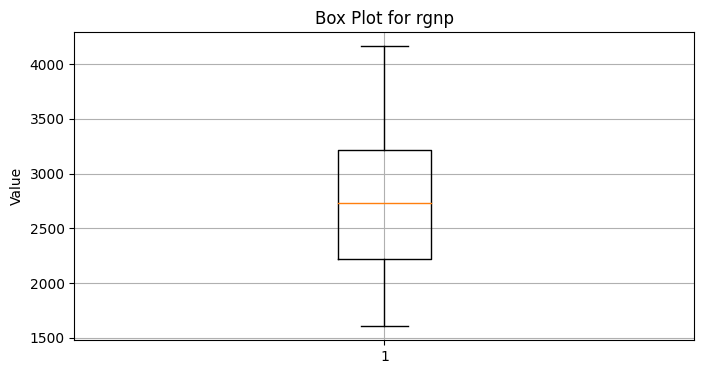

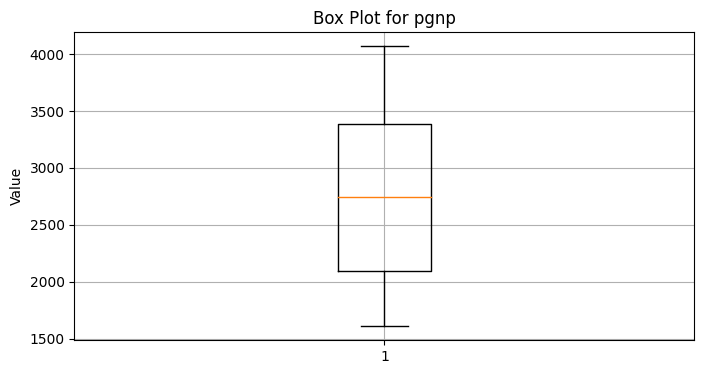

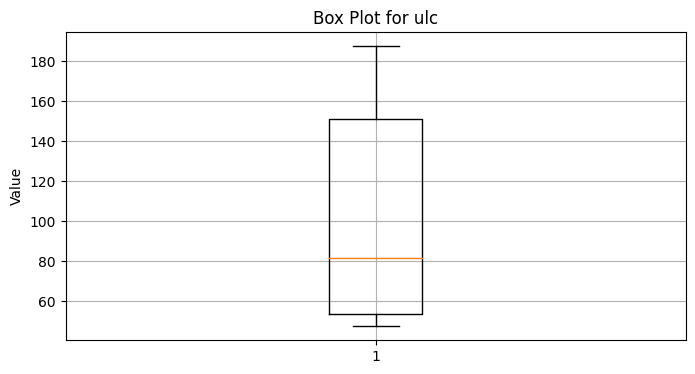

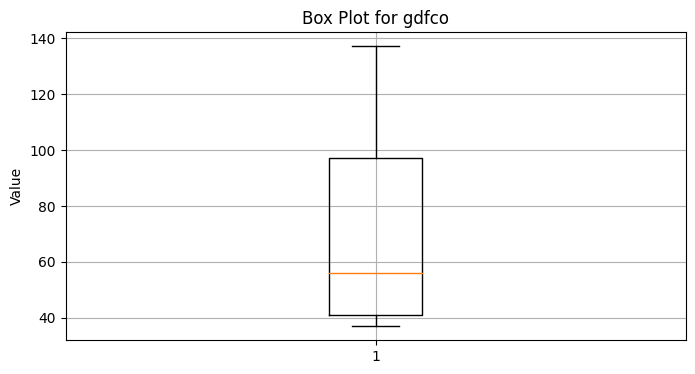

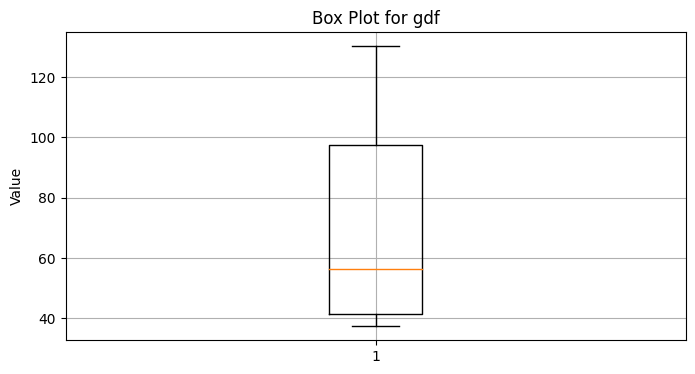

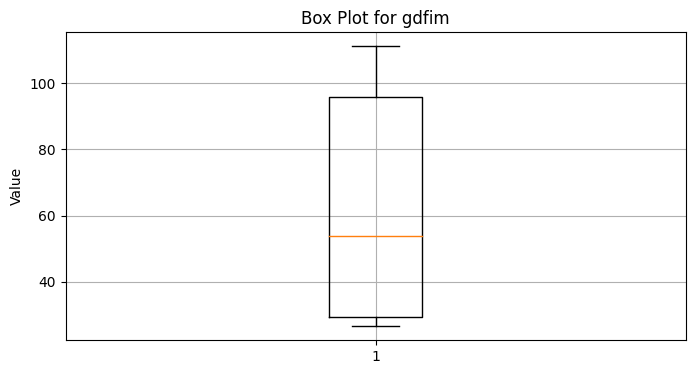

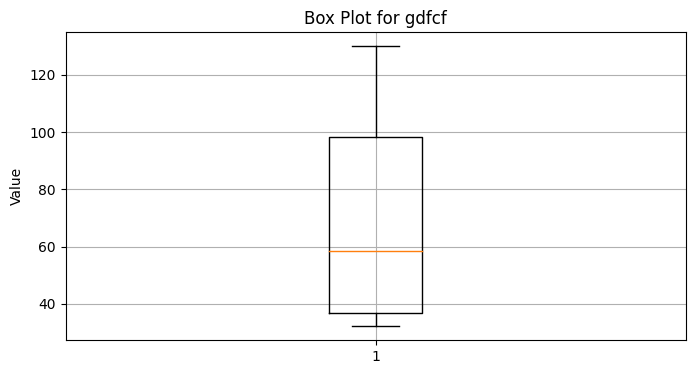

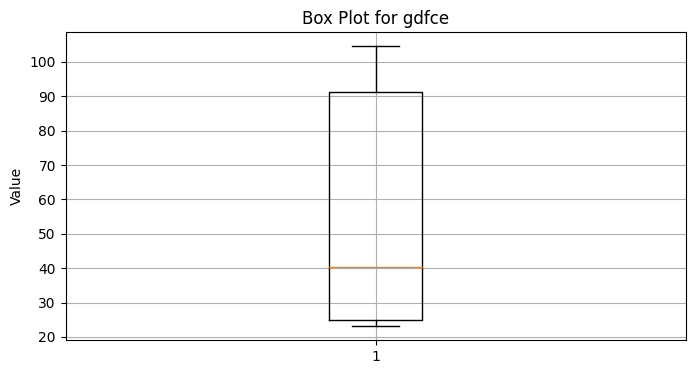

In [ ]:
# Plot each column separately to check for outliers
for column in df.columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[column])
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

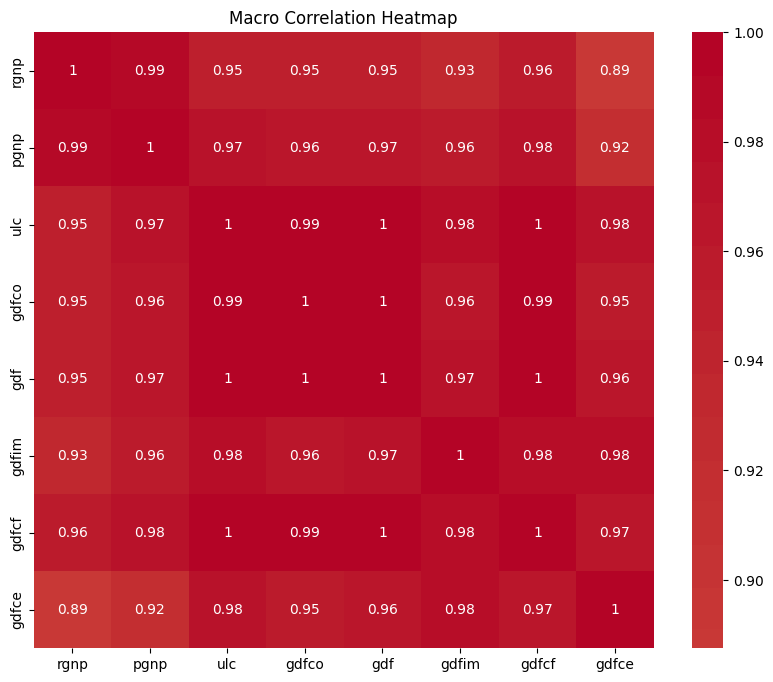

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Macro Correlation Heatmap')
plt.show()

**Lag-Plot of Variables**

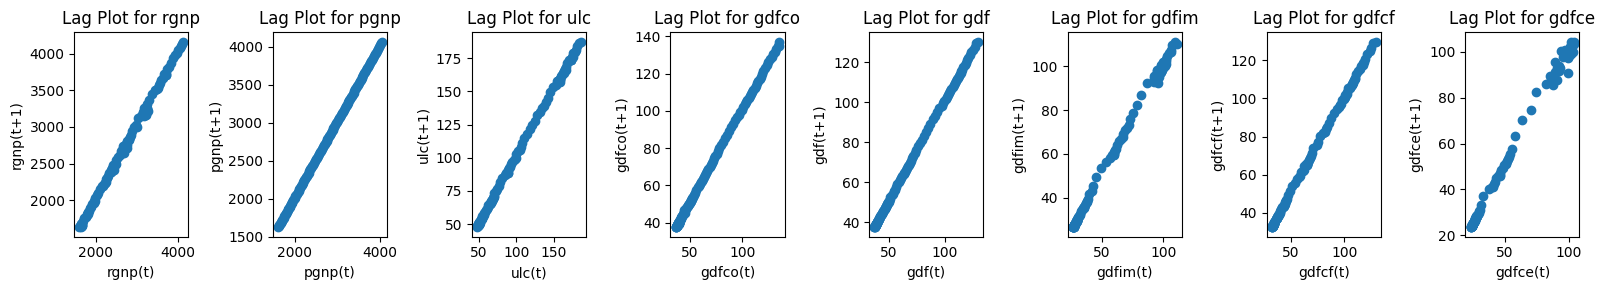

In [ ]:
num_columns = len(df.columns)
fig, axes = plt.subplots(1, num_columns, figsize=(16, 3))

for idx, column in enumerate(df.columns):
    pd.plotting.lag_plot(df[column], ax=axes[idx])
    axes[idx].set_title(f"Lag Plot for {column}")
    axes[idx].set_xlabel(f"{column}(t)")
    axes[idx].set_ylabel(f"{column}(t+1)")

plt.tight_layout()
plt.show()

### **ACF & PACF Plots**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

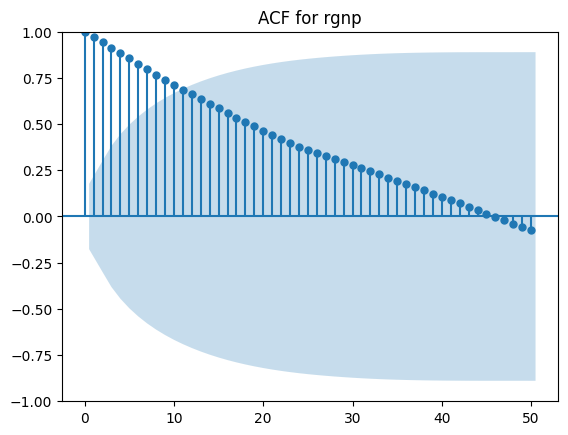

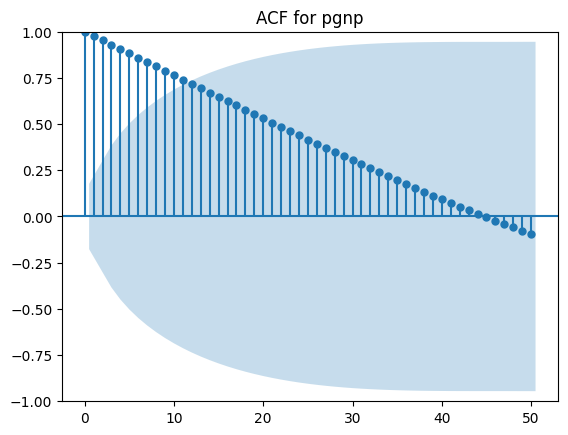

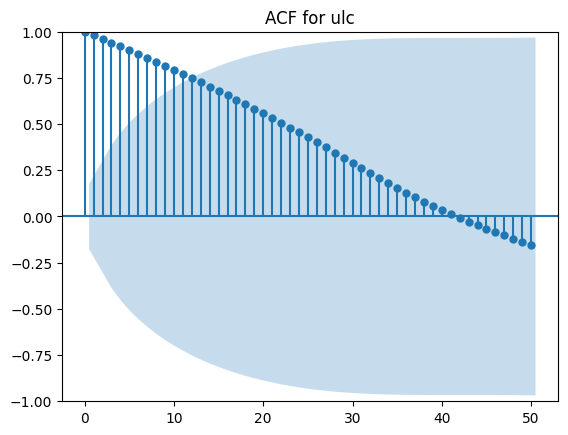

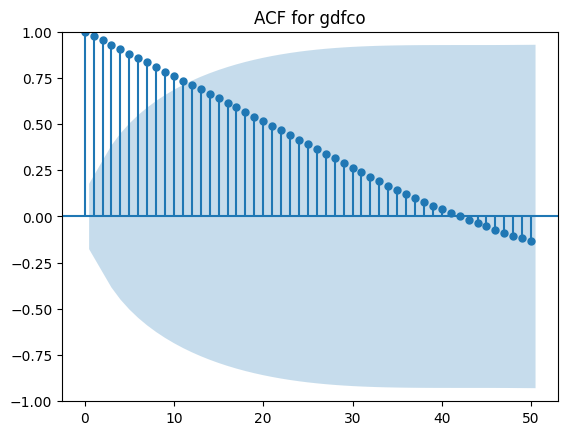

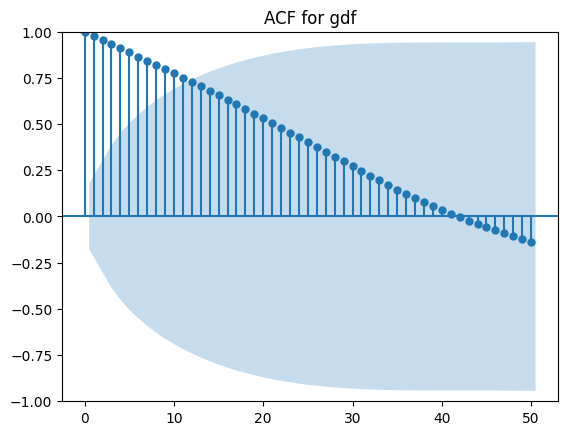

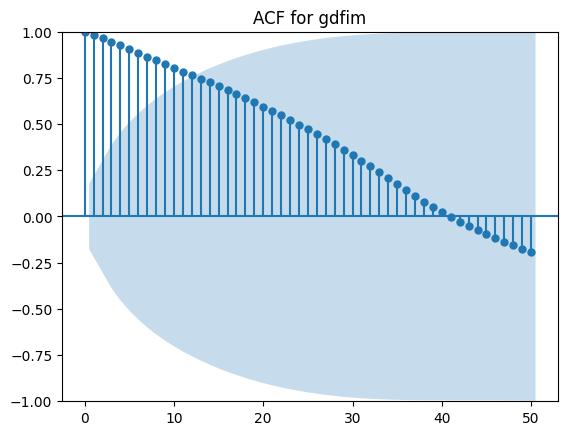

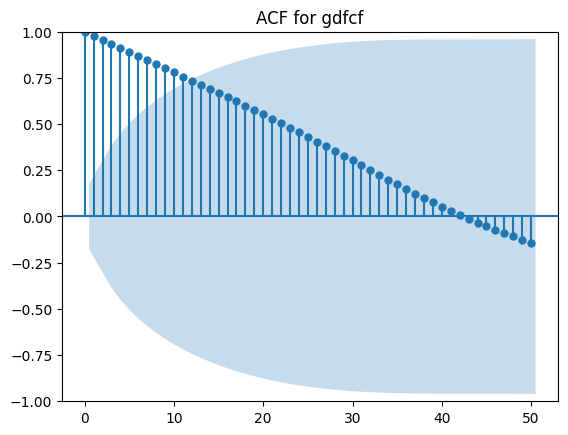

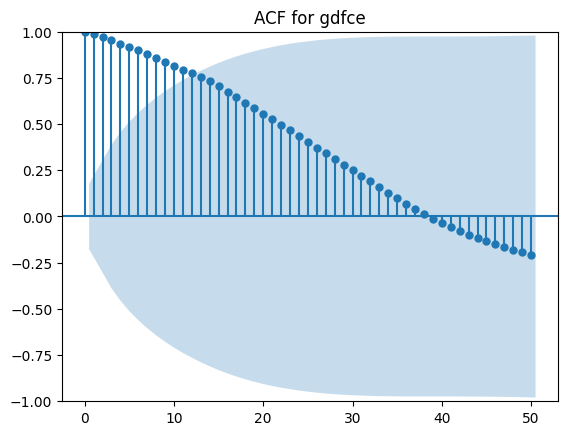

In [ ]:
for i in df:
  plot_acf(df[i], lags=50)
  plt.title('ACF for %s'%i)
  plt.show()

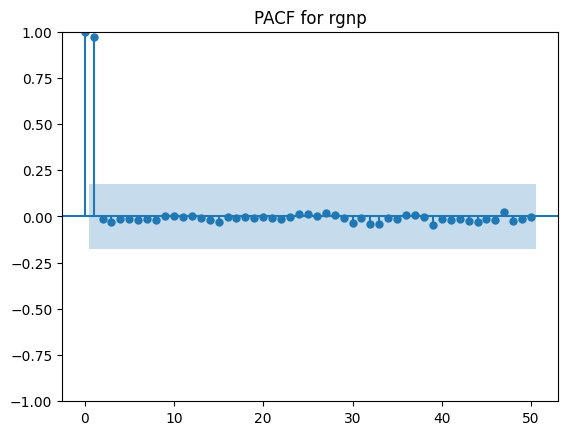

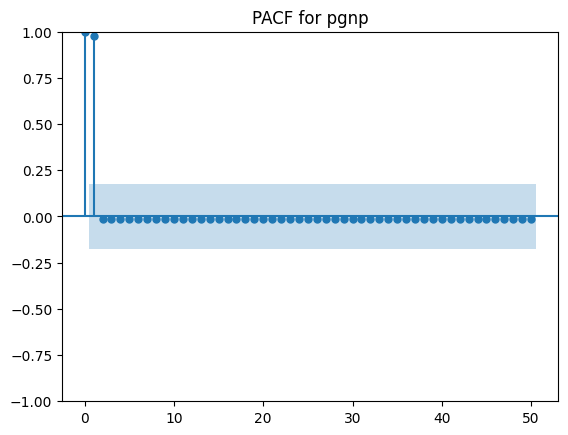

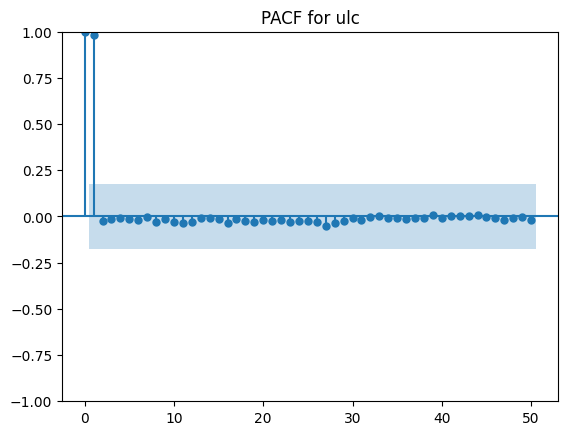

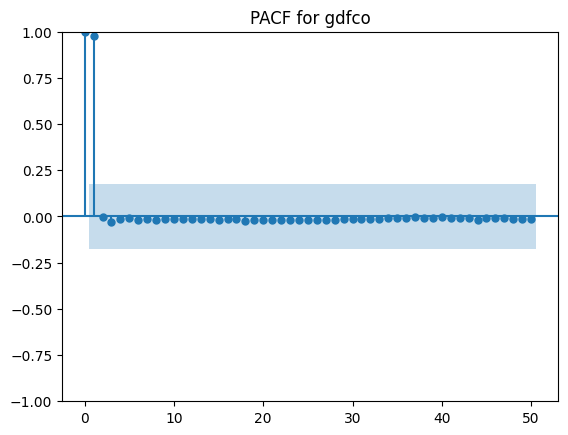

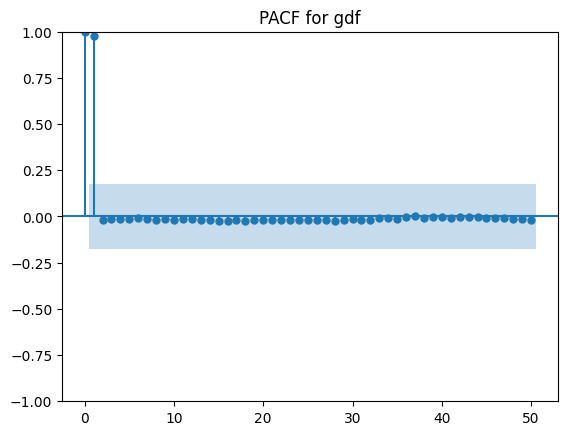

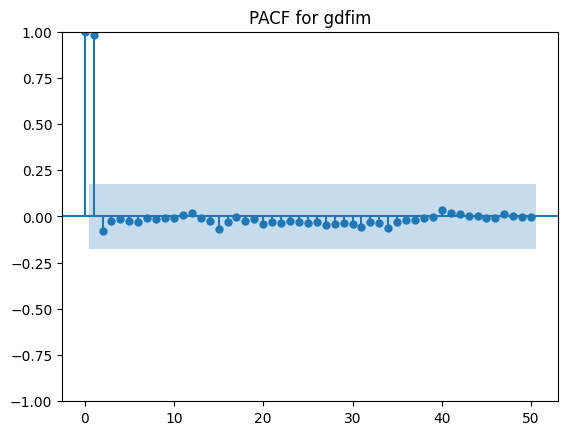

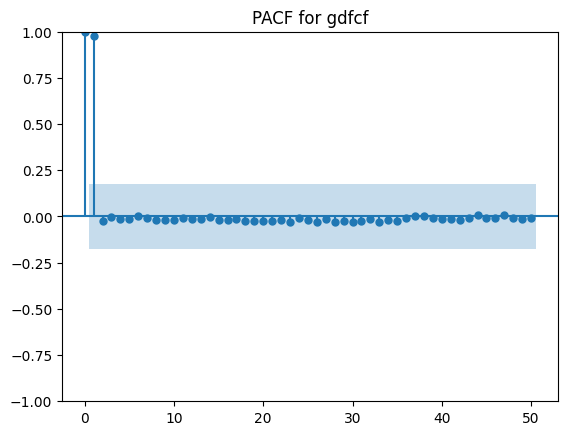

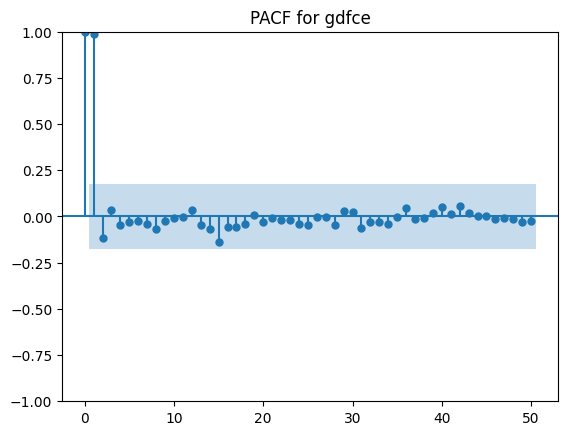

In [ ]:
for i in df:
  plot_pacf(df[i], lags=50)
  plt.title('PACF for %s'%i)
  plt.show()

## **Granger Causality Test**

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table
    are the P-Values. P-Values lesser than the significance level (0.05), implies
    the Null Hypothesis that the coefficients of the corresponding past values is
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1

,rgnp_x,pgnp_x,ulc_x,gdfco_x,gdf_x,gdfim_x,gdfcf_x,gdfce_x
rgnp_y,1.0000,0.0003,0.0001,0.0212,0.0014,0.0620,0.0001,0.0071
pgnp_y,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
ulc_y,0.0000,0.0000,1.0000,0.0002,0.0000,0.0000,0.0000,0.0041
gdfco_y,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
gdf_y,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
gdfim_y,0.0011,0.0067,0.0014,0.0083,0.0011,1.0000,0.0004,0.0000
gdfcf_y,0.0000,0.0000,0.0008,0.0008,0.0000,0.0038,1.0000,0.0009
gdfce_y,0.0025,0.0485,0.0000,0.0002,0.0000,0.0000,0.0000,1.0000


## **Johanssen Cointegration**

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [ ]:
def cointegration_test(df, alpha=0.05):
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
rgnp   ::  248.0     > 143.6691  =>   True
pgnp   ::  183.12    > 111.7797  =>   True
ulc    ::  130.01    > 83.9383   =>   True
gdfco  ::  85.28     > 60.0627   =>   True
gdf    ::  55.05     > 40.1749   =>   True
gdfim  ::  31.59     > 24.2761   =>   True
gdfcf  ::  14.06     > 12.3212   =>   True
gdfce  ::  0.45      > 4.1296    =>   False


## **Train-Test Split**

In [ ]:
nobs = 10
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)
print(df_test.shape)

(113, 8)
(10, 8)


**ADF Function for Stationarity**

In [ ]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [ ]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "rgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.0812
 No. Lags Chosen       = 2
 Critical value 1%     = -3.491
 Critical value 5%     = -2.888
 Critical value 10%    = -2.581
 => P-Value = 0.9648. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "pgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.929
 No. Lags Chosen       = 1
 Critical value 1%     = -3.491
 Critical value 5%     = -2.888
 Critical value 10%    = -2.581
 => P-Value = 0.9935. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ulc" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. 

<ipython-input-42-6190c5bd6949>:2: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



### **Differencing of Time-Series**

In [ ]:
df_differenced = df_train.diff().dropna()

In [ ]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "rgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.3551
 No. Lags Chosen       = 1
 Critical value 1%     = -3.491
 Critical value 5%     = -2.888
 Critical value 10%    = -2.581
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "pgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.9396
 No. Lags Chosen       = 0
 Critical value 1%     = -3.491
 Critical value 5%     = -2.888
 Critical value 10%    = -2.581
 => P-Value = 0.3137. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ulc" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signi

<ipython-input-44-6f3c31aca052>:2: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [ ]:
# Second Differencing
df_2differenced = df_differenced.diff().dropna()

In [ ]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_2differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

<ipython-input-46-996fc0726c58>:2: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



    Augmented Dickey-Fuller Test on "rgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.7997
 No. Lags Chosen       = 2
 Critical value 1%     = -3.492
 Critical value 5%     = -2.889
 Critical value 10%    = -2.581
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "pgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.6935
 No. Lags Chosen       = 0
 Critical value 1%     = -3.491
 Critical value 5%     = -2.888
 Critical value 10%    = -2.581
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ulc" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05


**Lag-Plot of differenced series**

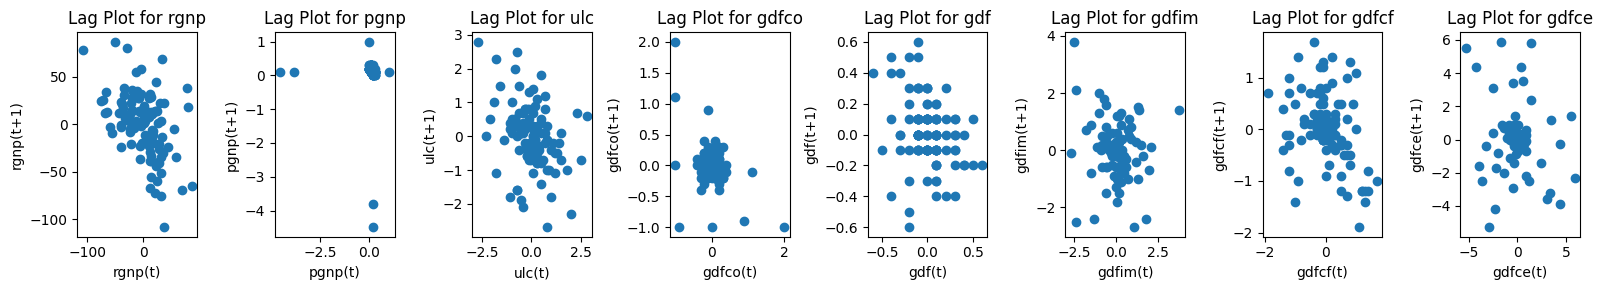

In [ ]:
num_columns = len(df_2differenced.columns)
fig, axes = plt.subplots(1, num_columns, figsize=(16, 3))

for idx, column in enumerate(df_2differenced.columns):
    pd.plotting.lag_plot(df_2differenced[column], ax=axes[idx])
    axes[idx].set_title(f"Lag Plot for {column}")
    axes[idx].set_xlabel(f"{column}(t)")
    axes[idx].set_ylabel(f"{column}(t+1)")

plt.tight_layout()
plt.show()

### **ACF and PACF of differenced data**

**ACF**

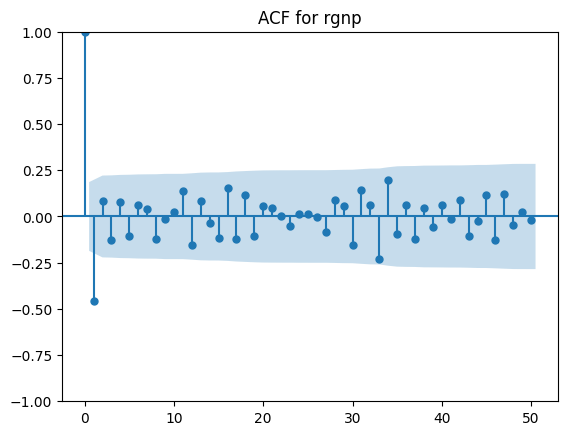

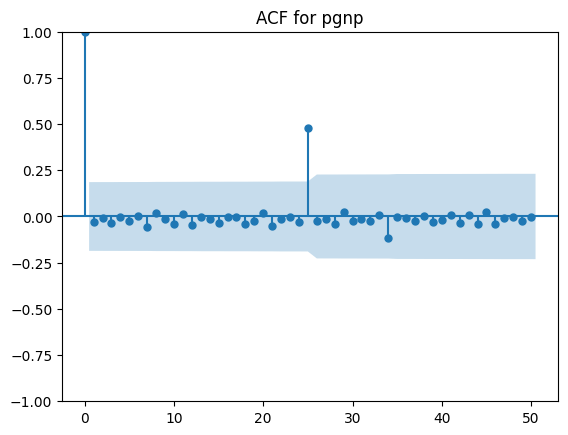

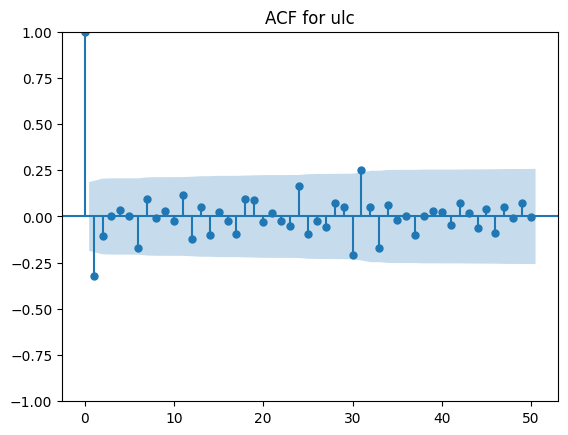

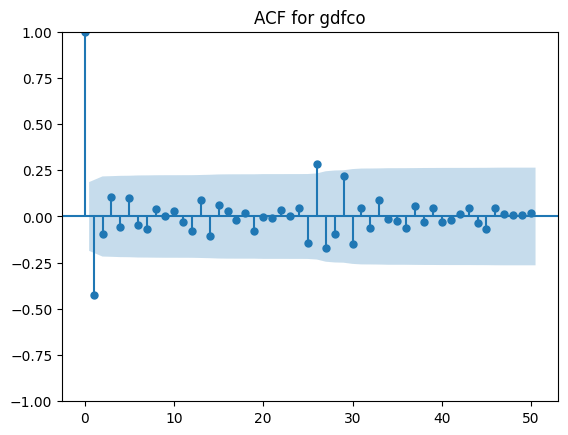

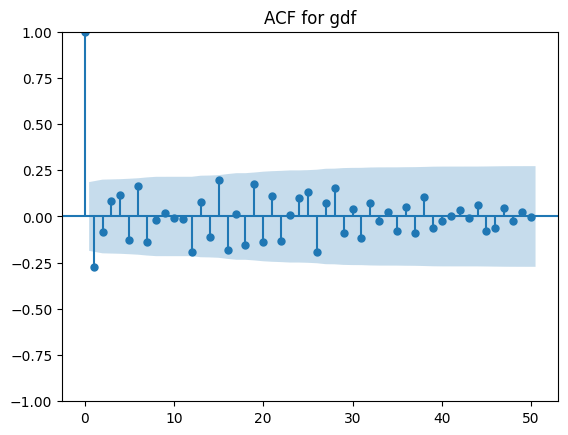

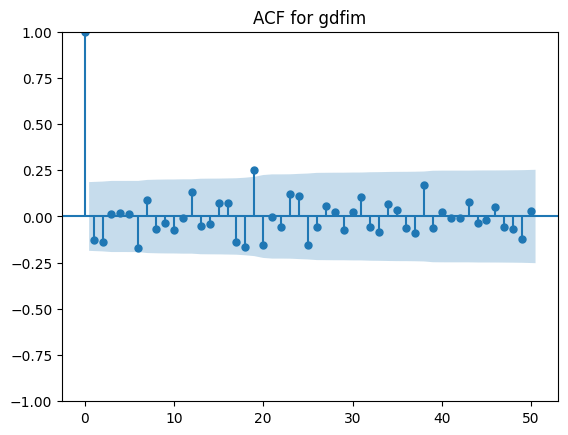

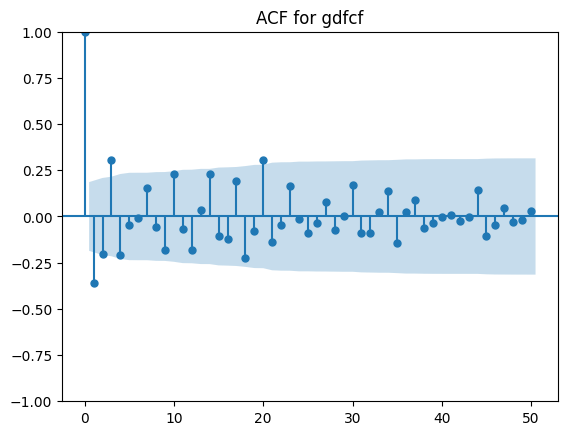

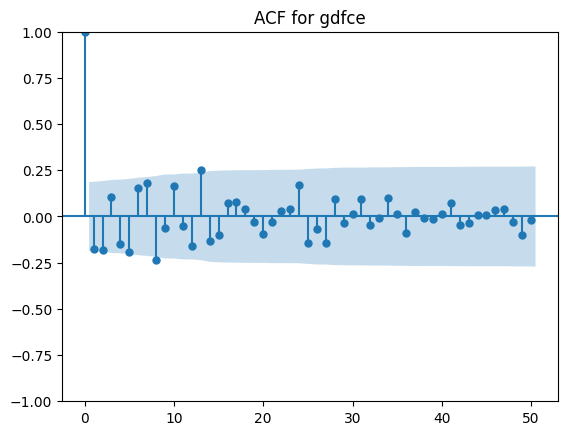

In [ ]:
for i in df_2differenced:
  plot_acf(df_2differenced[i], lags=50)
  plt.title('ACF for %s'%i)
  plt.show()

**PACF**

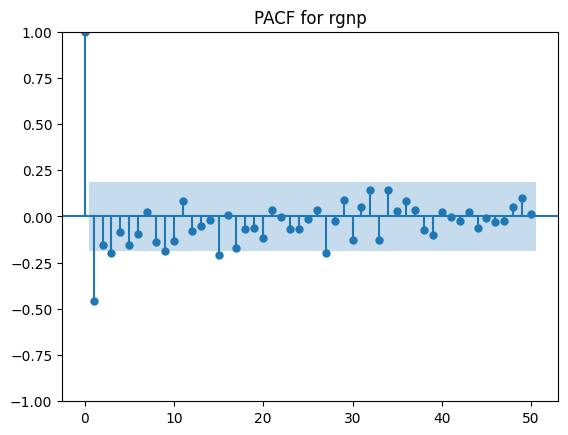

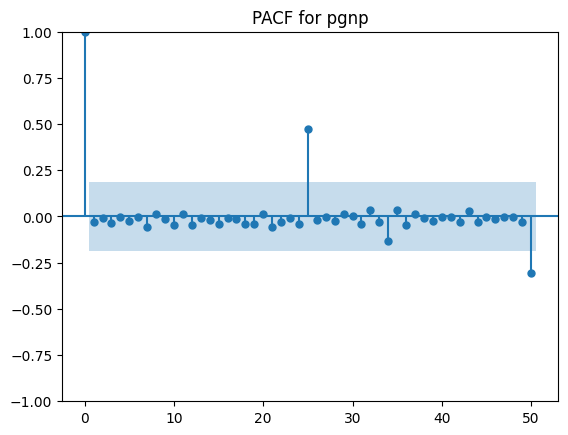

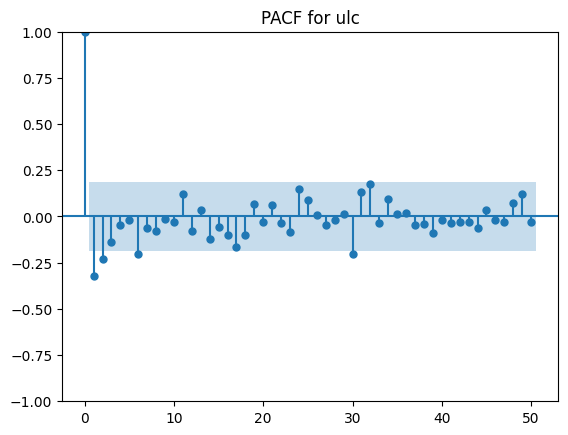

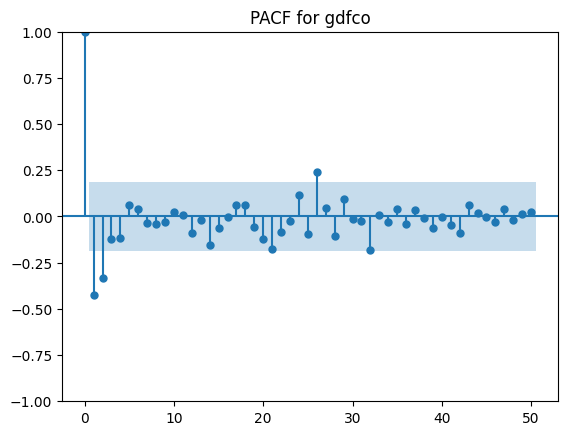

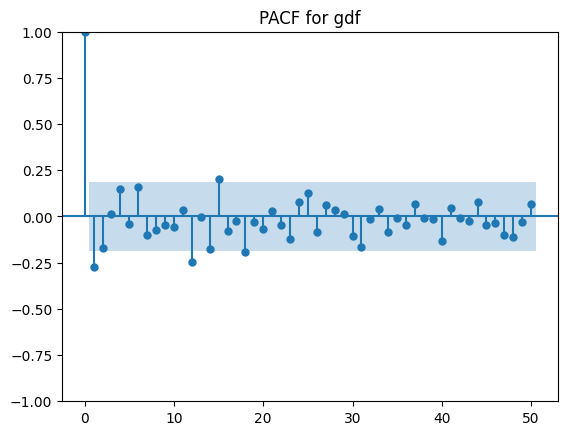

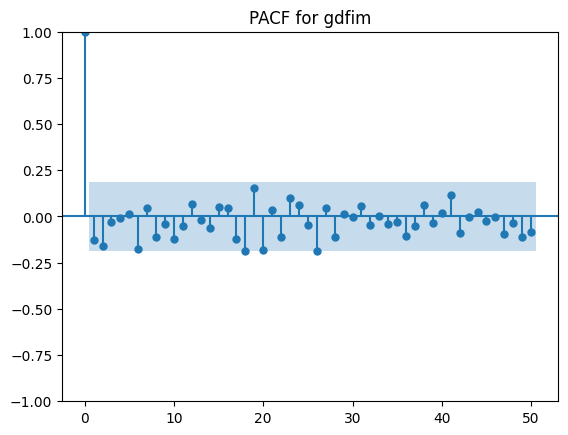

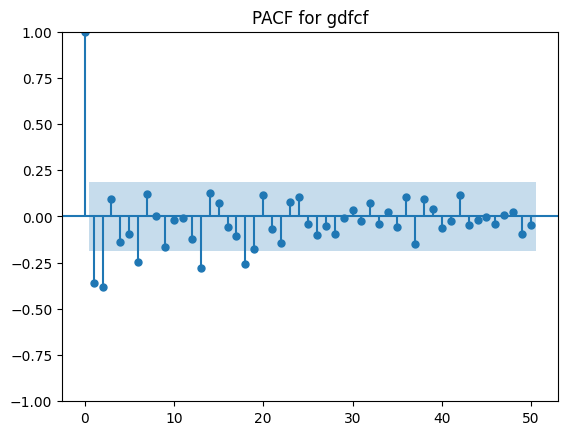

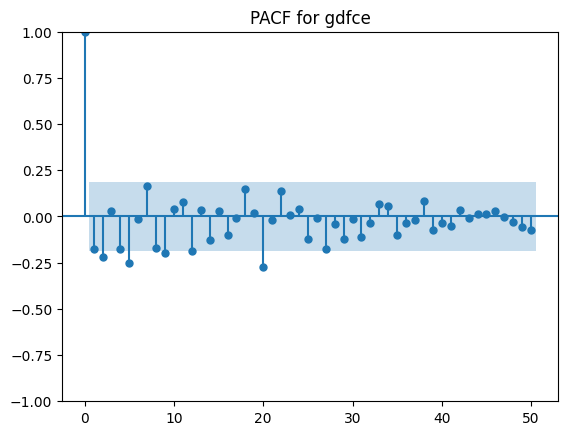

In [ ]:
for i in df_2differenced:
  plot_pacf(df_2differenced[i], lags=50)
  plt.title('PACF for %s'%i)
  plt.show()

## **Initiate and fit VAR**

In [ ]:
model = VAR(df_2differenced)
res = model.select_order(9)
res.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.



,AIC,BIC,FPE,HQIC
0,-0.4206,-0.2147*,0.6566,-0.3373*
1,-0.9777,0.8752,0.3776,-0.2274
2,-1.321,2.179,0.2737,0.09657
3,-1.581,3.566,0.2233,0.5035
4,-1.832,4.962,0.1942,0.9194
5,-1.671,6.771,0.2763,1.748
6,-2.504,7.584,0.1629,1.581
7,-3.083,8.652,0.1457,1.669
8,-3.967,9.416,0.1217,1.452
9,-5.673*,9.357,0.06433*,0.4133


In [ ]:
#Fit to a VAR model
model_fit = model.fit(maxlags=4)

#Print a summary of the model results
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 05, Sep, 2023
Time:                     07:31:06
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    4.27874
Nobs:                     107.000    HQIC:                  0.357480
Log likelihood:          -826.711    FPE:                   0.116500
AIC:                     -2.31590    Det(Omega_mle):       0.0135635
--------------------------------------------------------------------
Results for equation rgnp
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            1.681019         2.804510            0.599           0.549
L1.rgnp         -0.819715         0.170933           -4.796           0.000
L1.pgnp         -0.440361         5.253974           -0.084           0.933
L1.ul

**Correlation of residuals using Durbin-Watson Statistic**

In [ ]:
from statsmodels.stats.stattools import durbin_watson

In [ ]:
out = durbin_watson(model_fit.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

rgnp : 2.1
pgnp : 2.02
ulc : 2.2
gdfco : 2.07
gdf : 2.23
gdfim : 1.97
gdfcf : 2.22
gdfce : 2.08


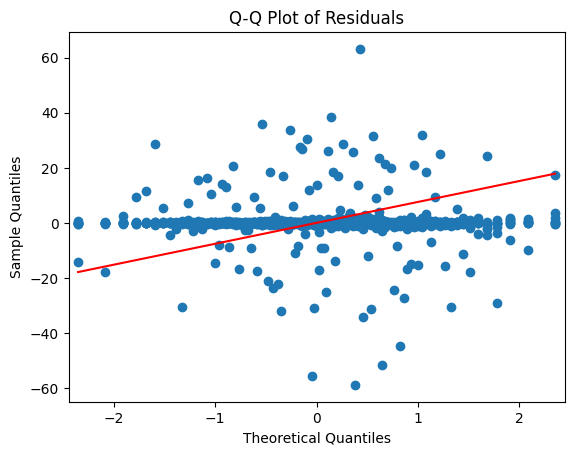

In [ ]:
# Create the Q-Q plot
sm.qqplot(model_fit.resid, line='s')  # 's' for a standardized line

# Add labels and a title
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Display the plot
plt.show()

# **Forecasting Using VAR**

In [ ]:
# Get the lag order
lag_order = model_fit.k_ar
print(lag_order)

4


In [ ]:
forecast_input = df_2differenced.values[-lag_order:]
forecast_input

array([[-7.52000000e+01,  1.00000000e-01,  2.80000000e+00,
         1.00000000e-01,  1.42108547e-14, -2.50000000e+00,
         2.00000000e-01, -5.30000000e+00],
       [ 2.43000000e+01,  1.00000000e-01,  6.00000000e-01,
         4.00000000e-01,  3.00000000e-01,  3.80000000e+00,
         1.40000000e+00,  5.50000000e+00],
       [ 1.34000000e+01,  2.00000000e-01, -7.00000000e-01,
        -1.00000000e-01, -1.00000000e-01,  1.40000000e+00,
        -8.00000000e-01,  1.40000000e+00],
       [ 2.82000000e+01,  1.00000000e-01, -1.60000000e+00,
         3.00000000e-01,  5.00000000e-01,  1.40000000e+00,
        -2.00000000e-01,  5.80000000e+00]])

In [ ]:
# Forecast
fc = model_fit.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,rgnp_2d,pgnp_2d,ulc_2d,gdfco_2d,gdf_2d,gdfim_2d,gdfcf_2d,gdfce_2d
date,,,,,,,,
1987-04-01,-18.588271,-0.716200,0.853217,0.611790,0.188520,0.235103,0.133717,0.592489
1987-07-01,-30.266993,-0.896453,1.332575,-0.071571,0.091808,-0.634481,-0.101032,-5.556833
1987-10-01,13.884139,-0.342096,-0.770229,-0.282510,-0.010973,-0.736846,1.026292,-1.393860
1988-01-01,-39.288473,-0.127382,0.573455,-0.138684,0.118512,-0.821489,-0.111249,1.056176
1988-04-01,12.859094,0.367074,0.168269,0.208339,-0.029227,0.003712,-0.574942,1.933981
1988-07-01,34.025566,0.298249,-0.798326,0.099202,0.051563,0.343825,0.152082,1.653770
1988-10-01,3.595011,0.157390,-0.313783,-0.041917,-0.111884,0.408064,-0.673584,-0.084728
1989-01-01,-23.172468,-0.010369,0.210440,-0.095666,-0.122529,-0.335525,-0.333660,-1.196540
1989-04-01,-5.750743,-0.098315,0.349002,0.007298,-0.024351,-0.429819,0.477541,-2.090323


## **Invert the Transformations**

**Invert Function**

In [ ]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [ ]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)
df_results.loc[:, ['rgnp_forecast', 'pgnp_forecast', 'ulc_forecast', 'gdfco_forecast',
                   'gdf_forecast', 'gdfim_forecast', 'gdfcf_forecast', 'gdfce_forecast']]

,rgnp_forecast,pgnp_forecast,ulc_forecast,gdfco_forecast,gdf_forecast,gdfim_forecast,gdfcf_forecast,gdfce_forecast
date,,,,,,,,
1987-04-01,3813.811729,3853.583800,174.853217,125.211790,118.888520,101.335103,116.733717,93.792489
1987-07-01,3814.356464,3874.871146,177.439008,127.452009,120.468848,104.135724,117.866402,92.628145
1987-10-01,3828.785339,3895.816397,179.254571,129.409717,122.038202,106.199499,120.025379,90.069941
1988-01-01,3803.925741,3916.634266,181.643589,131.228741,123.726069,107.441786,122.073107,88.567913
1988-04-01,3791.925237,3937.819210,184.200877,133.256104,125.384708,108.687784,123.545892,88.999866
1988-07-01,3813.950299,3959.302402,185.959838,135.382670,127.094911,110.277607,125.170759,91.085589
1988-10-01,3839.570372,3980.942984,187.405016,137.467318,128.693229,112.275495,126.122042,93.086584
1989-01-01,3842.017977,4002.573197,189.060635,139.456301,130.169019,113.937857,126.739665,93.891040
1989-04-01,3838.714839,4024.105096,191.065255,141.452582,131.620458,115.170401,127.834829,92.605173


## **Plot of Forecast vs Actual**

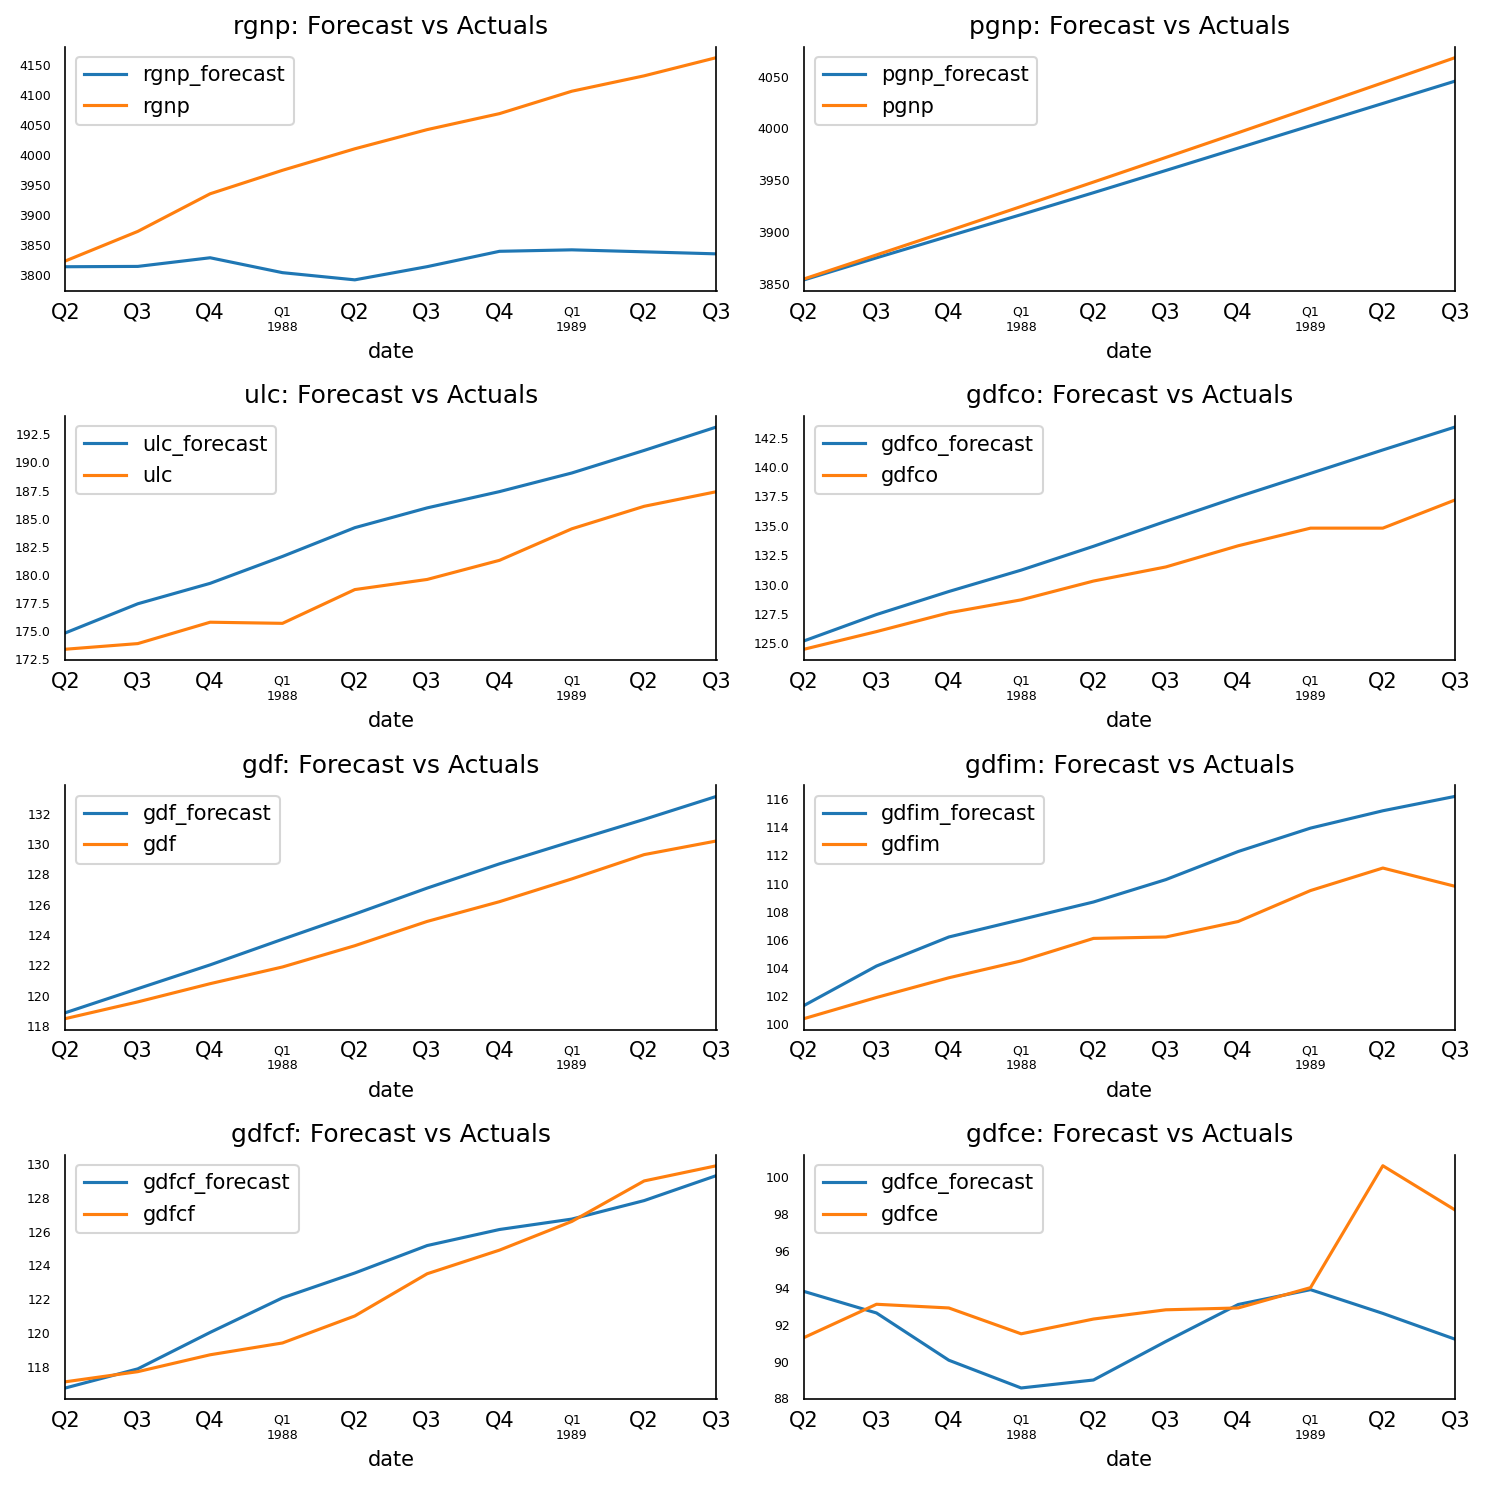

In [ ]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

## **Forecast Metrics of the variables**

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})


In [ ]:
print('Forecast Accuracy of: rgnp')
accuracy_prod = forecast_accuracy(df_results['rgnp_forecast'].values, df_test['rgnp'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: pgnp')
accuracy_prod = forecast_accuracy(df_results['pgnp_forecast'].values, df_test['pgnp'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: ulc')
accuracy_prod = forecast_accuracy(df_results['ulc_forecast'].values, df_test['ulc'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: gdfco')
accuracy_prod = forecast_accuracy(df_results['gdfco_forecast'].values, df_test['gdfco'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: gdf')
accuracy_prod = forecast_accuracy(df_results['gdf_forecast'].values, df_test['gdf'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: gdfim')
accuracy_prod = forecast_accuracy(df_results['gdfim_forecast'].values, df_test['gdfim'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: gdfcf')
accuracy_prod = forecast_accuracy(df_results['gdfcf_forecast'].values, df_test['gdfcf'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: gdfce')
accuracy_prod = forecast_accuracy(df_results['gdfce_forecast'].values, df_test['gdfce'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast Accuracy of: rgnp
mape :  0.047
me :  -190.9341
mae :  190.9341
mpe :  -0.047
rmse :  214.6783
corr :  0.5504
minmax :  0.047

Forecast Accuracy of: pgnp
mape :  0.0029
me :  -11.4549
mae :  11.4549
mpe :  -0.0029
rmse :  13.4085
corr :  1.0
minmax :  0.0029

Forecast Accuracy of: ulc
mape :  0.0266
me :  4.803
mae :  4.803
mpe :  0.0266
rmse :  5.0217
corr :  0.9774
minmax :  0.0259

Forecast Accuracy of: gdfco
mape :  0.0264
me :  3.5022
mae :  3.5022
mpe :  0.0264
rmse :  3.9737
corr :  0.996
minmax :  0.0255

Forecast Accuracy of: gdf
mape :  0.015
me :  1.882
mae :  1.882
mpe :  0.015
rmse :  2.0312
corr :  0.998
minmax :  0.0147

Forecast Accuracy of: gdfim
mape :  0.0332
me :  3.5556
mae :  3.5556
mpe :  0.0332
rmse :  3.8492
corr :  0.9845
minmax :  0.032

Forecast Accuracy of: gdfcf
mape :  0.0097
me :  0.763
mae :  1.1856
mpe :  0.0064
rmse :  1.4678
corr :  0.9609
minmax :  0.0096

Forecast Accuracy of: gdfce
mape :  0.0303
me :  -2.3668
mae :  2.9026
mpe :  -0.0244

<ipython-input-60-bb451a4dbec9>:9: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

<ipython-input-60-bb451a4dbec9>:11: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

